# Neural Networks: List 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Problem 1

Add two more patterns to the training set of the network from the list no. 1 and check its memorizing capabilities.

## Dataset

### Loading

In [16]:
a=np.array([[-1,-1,-1,-1,1],[1,-1,1,1,-1],[1,-1,1,1,-1],[1,-1,1,1,-1],[1,-1,-1,-1,1]])
b=np.array([[-1,-1,-1,-1,-1],[1,1,1,-1,1],[1,1,1,-1,1],[-1,1,1,-1,1],[-1,-1,-1,1,1]])
c=np.array([[1,-1,-1,-1,-1],[-1,1,1,1,1],[-1,1,1,1,1],[-1,1,1,1,1],[1,-1,-1,-1,-1]])
d=np.array([[-1,1,1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
p5=np.array([[1,-1,1,-1,1],[-1,1,-1,1,-1],[1,-1,1,-1,1],[-1,1,-1,1,-1],[1,-1,1,-1,1]])
p6=np.array([[1,-1,-1,-1,1],[-1,1,1,1,1],[1,-1,-1,-1,1],[1,1,1,1,-1],[1,-1,-1,-1,1]])
train = np.array([a, b, c, d, p5, p6])
t1=np.array([[-1,-1,-1,-1,1],[1,-1,1,1,-1],[1,-1,1,1,-1],[-1,-1,1,1,-1],[1,-1,-1,-1,1]])
t2=np.array([[-1,-1,-1,-1,1],[1,1,1,-1,1],[1,1,1,-1,1],[-1,1,1,-1,1],[-1,1,-1,1,1]])
t3=np.array([[-1,-1,-1,-1,1],[1,1,1,-1,1],[1,-1,1,-1,1],[1,1,1,1,1],[-1,-1,-1,1,1]])
t4=np.array([[-1,-1,-1,-1,-1],[-1,1,1,1,-1],[-1,1,-1,1,1],[-1,1,1,-1,1],[1,-1,-1,-1,-1]])
t5=np.array([[-1,1,1,1,-1],[-1,-1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
t6=np.array([[1,-1,1,1,-1],[1,-1,1,-1,-1],[-1,1,-1,1,1],[-1,1,1,1,-1],[-1,1,1,1,-1]])
t7=np.array([[-1,-1,-1,1,-1],[1,-1,1,1,-1],[1,-1,1,-1,-1],[-1,-1,1,1,-1],[1,1,1,-1,1]])
t8=np.array([[-1,1,1,1,-1],[-1,-1,1,1,-1],[1,1,-1,-1,1],[-1,1,1,1,-1],[-1,1,1,1,1]])
t9=np.array([[-1,-1,-1,-1,1],[1,1,1,1,1],[-1,1,1,1,1],[-1,1,-1,-1,1],[-1,-1,1,1,1]])
t10=np.array([[-1,-1,1,1,-1],[-1,1,1,1,1],[1,1,1,-1,1],[1,1,1,1,1],[1,1,-1,-1,1]])
t11=np.array([[-1,-1,1,1,1],[1,1,1,-1,-1],[-1,1,-1,1,-1],[-1,1,-1,-1,1],[-1,1,1,1,-1]])
t12=np.array([[1,-1,1,-1,1],[-1,1,1,1,-1],[1,-1,1,1,1],[-1,-1,-1,1,1],[1,-1,-1,1,-1]])
t13=np.array([[1,1,1,1,-1],[1,-1,1,-1,1],[1,1,1,1,-1],[-1,-1,1,1,-1],[-1,1,1,-1,1]])
test = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13])

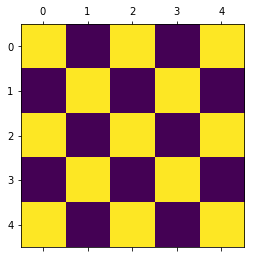

In [17]:
plt.matshow(p5)

In [18]:
import hopfield

## Asynchronous

In [19]:
old_network = hopfield.Hopfield(25, (5, 5), synchronous=False)
old_network.train(train)

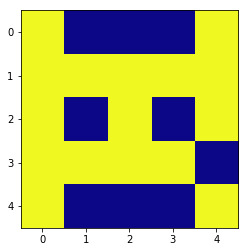

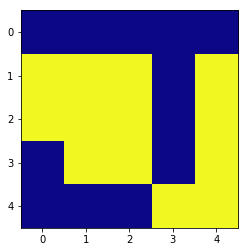

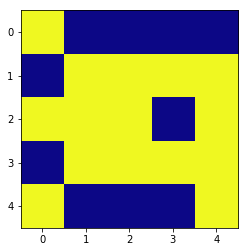

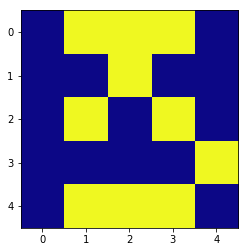

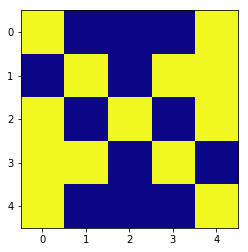

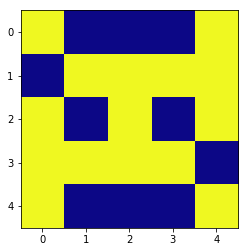

In [20]:
for i in range(6):
  plt.imshow(old_network.update(train[i]), cmap='plasma')
  plt.show()

## Synchronous

In [21]:
old_network_sync = hopfield.Hopfield(25, (5, 5), synchronous=True)
old_network_sync.train(train)

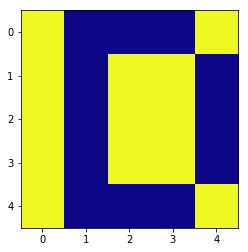

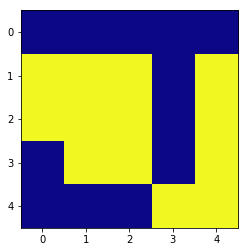

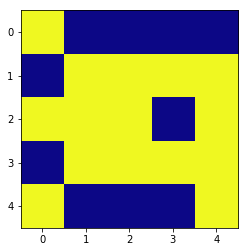

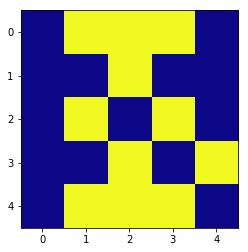

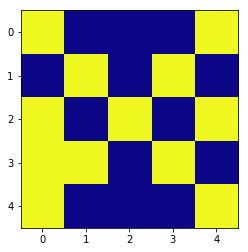

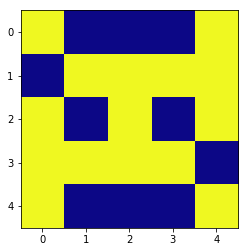

In [22]:
for i in range(6):
  plt.imshow(old_network_sync.update(train[i]), cmap='plasma')
  plt.show()

As it can be seen, the newtork is not able to memorize that many patterns. Only two of the training patterns are stabls.

# Problem 2

In [24]:
def minimize_me(x):
  return -(1-np.sin(10*np.sqrt(x)))**2

### Using out of the box scipy procedure

In [25]:
from scipy.optimize import minimize

In [32]:
out_of_the_box_solution = minimize(fun=minimize_me, x0=np.array([0.35]), bounds=[(0.1, 0.6)])

In [33]:
out_of_the_box_solution

      fun: array([-4.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([  8.88178420e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 5
   status: 0
  success: True
        x: array([ 0.22206609])

### Steepest gradient

In [37]:
def minimize_me_derivative(x):
  return 10*(1-np.sin(10*np.sqrt(x)))*np.cos(10*np.sqrt(x))*np.power(x,-0.5)

In [77]:
def steepest_gradient(function, function_deriv, initial, bounds, learning_rate, tolerance):
  argument = initial
  deriv_value = function_deriv(argument)
  while np.abs(deriv_value) > tolerance:
    new_argument = argument - learning_rate * deriv_value
    if new_argument < bounds[0] or argument > bounds[1]:
      raise Exception('Procedure diverged out of the domain.')
    else:
      argument = new_argument
    deriv_value = function_deriv(argument)
  return argument

In [78]:
steepest_gradient(minimize_me, minimize_me_derivative, np.array([0.5]), bounds=(0.1, 0.6), learning_rate=0.001, tolerance=1e-6)

array([ 0.2220661])

Both procedures converged to the same argument.